In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npy
import seaborn as sns
import missingno as msno
from quilt.data.ResidentMario import missingno_data
from difflib import SequenceMatcher
from sklearn.cluster import KMeans

# 1 - Create fonction

In [2]:
#Fonction Utile #1
def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum()))*100/(len(data)*len(data.columns)))
    return all_empty_cell 

In [3]:
#Fonction Utile #2
def mEmptyMatrix(d):
    %matplotlib inline
    a = msno.bar(d.sample(0))
    return a 

#Fonction Utile #3
def mEmptyGraph(d,str):
    d_1 = {'': [d, 100-d]}
    d_2 = pd.DataFrame(data=d_1)
    d_2.index = ['Cellules Vides', ' Cellules Pleines'] 
    plot = d_2.plot.pie(subplots=True, figsize=(10,10), fontsize=15)
    plt.title(str, fontsize=15)
    return plot

#Fonction Utile #4
def mDuplicateGraph(d):
    d_1 = {'': [ 100-d, d]}
    d_2 = pd.DataFrame(data=d_1)
    d_2.index = ['Duplicate Cell', 'Unique Cell'] 
    plot = d_2.plot.pie(subplots=True, figsize=(10,10), fontsize=15)
    return plot

# 2 - Call CSV

In [4]:
#Call CSV
data=pd.read_csv('off_data.csv', sep='\t',encoding = 'UTF-8',low_memory = False)

# 3.Check Données

In [5]:
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1555491, 183)
//////////////////////
Empty Cell 1 :  79 %
//////////////////////


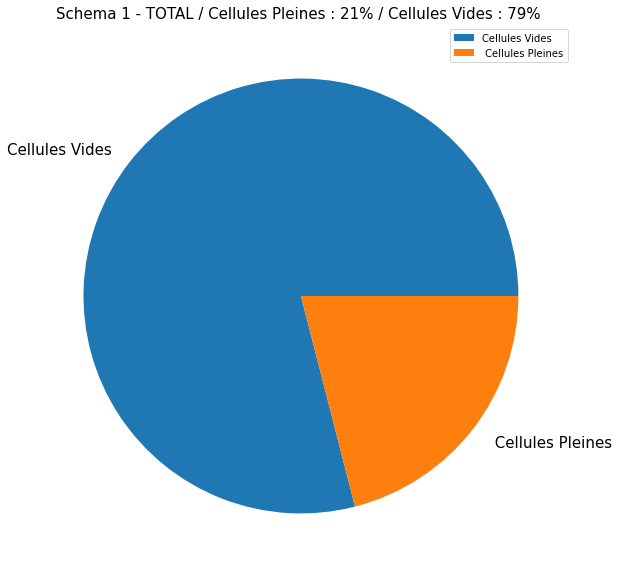

In [6]:
print(data.shape)
mEmptyCell_data = mEmptyCell(data)
print("//////////////////////")
print("Empty Cell 1 : ", mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 1 - TOTAL / Cellules Pleines : 21% / Cellules Vides : 79% '
a = mEmptyGraph(mEmptyCell_data, str)

# 4. 1er Nettoyage // Empty Col

print all col ---> (1555491, 183)
print new col ---> (1555491, 169)


Text(0.5, 1.0, 'Schema 3 - 1er passage : Colonnes Vides / Colonnes avec données  / Colonnes totalement Vides')

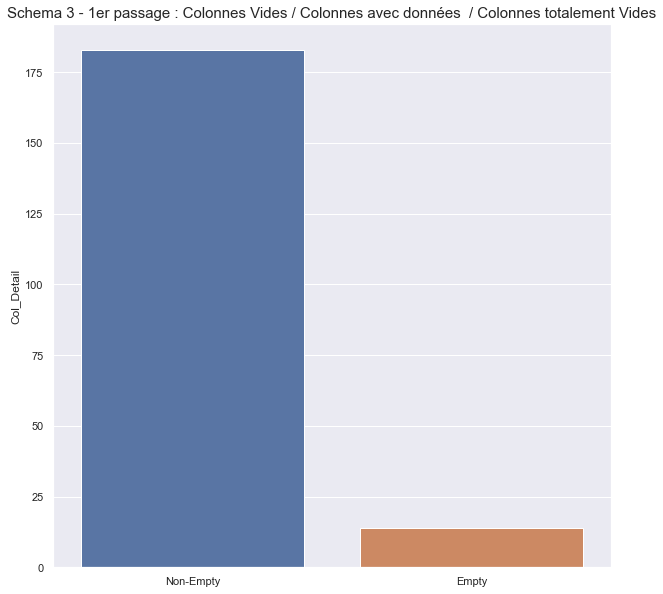

In [7]:
#Colonne entierement vide
d_1 = data.dropna(axis=1, how='all')
print('print all col --->', data.shape)
print('print new col --->', d_1.shape)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
d_1_1_1 = {'Col_Detail': [183, 183 - 169]}
d_1_1 = pd.DataFrame(data=d_1_1_1)
d_1_2 = d_1_1.rename(index={0: 'Non-Empty', 1: 'Empty'})

ax = sns.barplot(x=d_1_2.index, y="Col_Detail", data=d_1_2)
str = 'Schema 3 - 1er passage : Colonnes Vides / Colonnes avec données  / Colonnes totalement Vides'
plt.title(str, fontsize=15)

(1555491, 183)
(183,)


Text(0.5, 1.0, 'Schema 2 - 1er passage  : Colonnes Vides - Barplot')

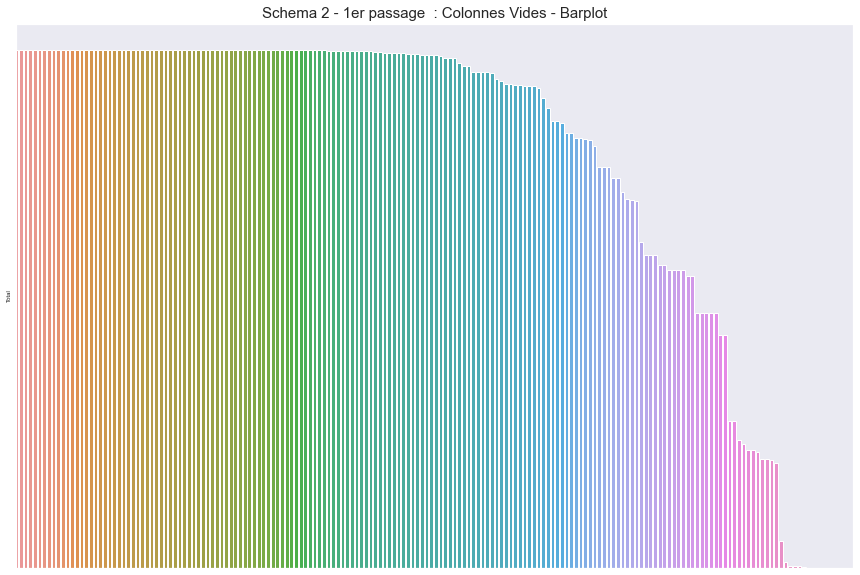

In [8]:
print(data.shape)

data.loc["Total"] = data.isna().sum()
data.loc["Total"] = data.loc["Total"]/1555491
data_001 = data.T
data_002 = pd.to_numeric(data_001['Total'])
print(data_002.shape)
#count    169.000000
#mean       0.755714
#std        0.355087
#min        0.000000
#25%        0.551574
#50%        0.996222
#75%        0.999908
#max        1.000000
data_003 = pd.DataFrame(data=data_002)
data_004 = data_003.sort_values(by=['Total'], ascending=False)
plt.figure(figsize=(15, 10))
sns.set(font_scale=0.5)
#sns.set_theme(style="whitegrid")
res = sns.barplot(x=data_004.index, y="Total", data=data_004)
res.set(xlim=(3),xticks=[],yticks=[])
plt.xticks(rotation=90)
str = "Schema 2 - 1er passage  : Colonnes Vides - Barplot"
plt.title(str, fontsize=15)

//////////////////////
Empty Cell 2 :  77 %
//////////////////////


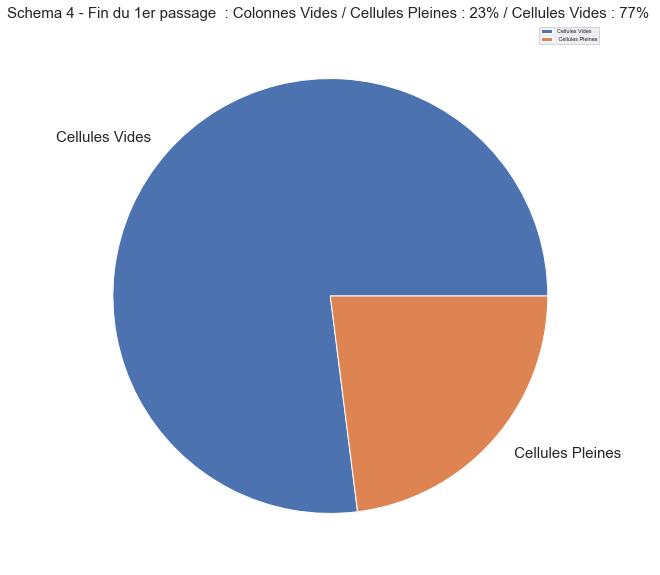

In [9]:
mEmptyCell_data = mEmptyCell(d_1)
print("//////////////////////")
print("Empty Cell 2 : ", mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 4 - Fin du 1er passage  : Colonnes Vides / Cellules Pleines : 23% / Cellules Vides : 77% '
a = mEmptyGraph(mEmptyCell_data,str)

# 5. 2eme Nettoyage // Keep Row France

In [10]:
d_1.head(4)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

d_Count2 = data['countries']
print('print A row --->', d_Count2.shape)

print A row ---> (1555492,)


In [12]:
d_C2 = d_Count2.to_frame()
d_C3 = d_C2.dropna()
d_11 = d_C3[d_C3['countries'].str.contains("Fr",na=False)]
print('print A row --->', d_11.shape)


print A row ---> (510660, 1)


In [13]:
d_2_1_1 = {"Row_Detail" : [1555491, 1555491 - 510660]}
d_2_1 = pd.DataFrame(data=d_2_1_1)
d_2_2 = d_2_1.rename(index={0: 'All Row', 1: 'France Row'})
d_2_2

,Row_Detail
All Row,1555491
France Row,1044831


Text(0.5, 1.0, 'Schema 5 - 2eme passage : Label France  /  Toutes Lignes /  Lignes France - Barplot')

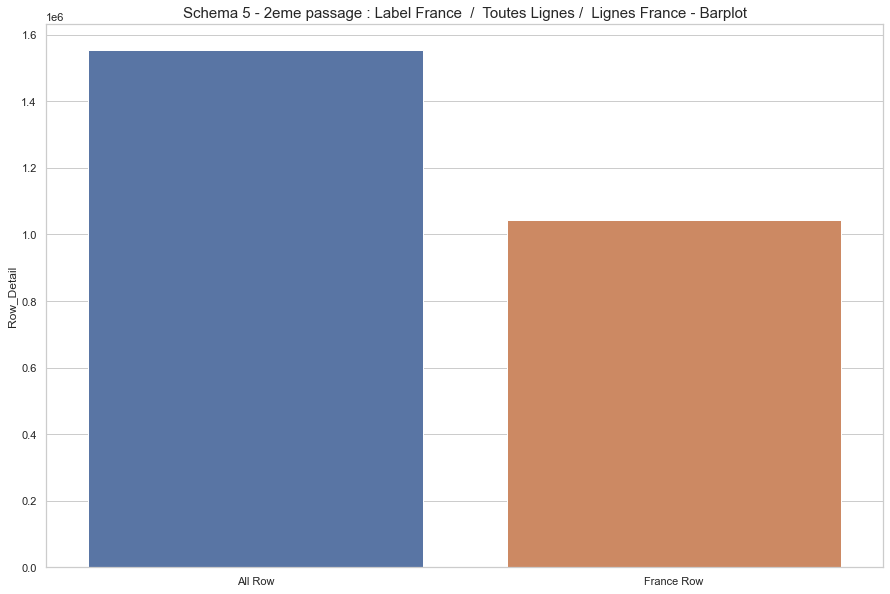

In [14]:


plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=d_2_2.index, y="Row_Detail", data=d_2_2)
str = "Schema 5 - 2eme passage : Label France  /  Toutes Lignes /  Lignes France - Barplot"
plt.title(str, fontsize=15)

In [15]:
d_1 = pd.merge(d_1, d_11, left_index=True, right_index=True)
d_1.shape

(510660, 170)

//////////////////////
Empty Cell 2 :  75 %
//////////////////////


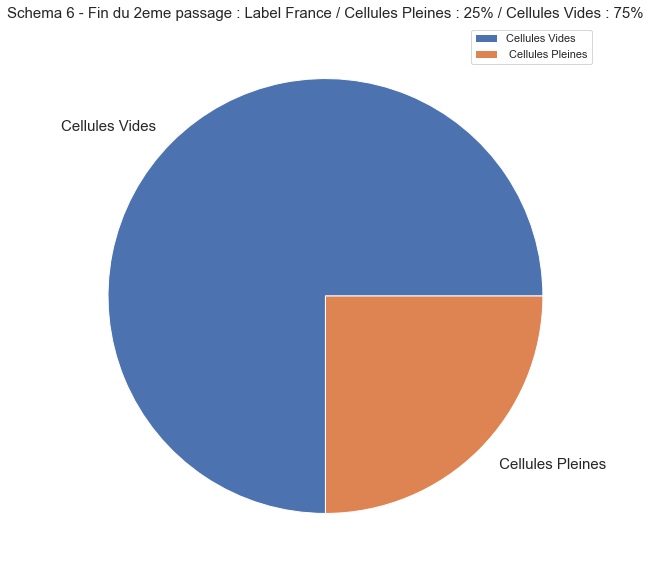

In [16]:
mEmptyCell_data = mEmptyCell(d_1)
print("//////////////////////")
print("Empty Cell 2 : ", mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 6 - Fin du 2eme passage : Label France / Cellules Pleines : 25% / Cellules Vides : 75%'
a = mEmptyGraph(mEmptyCell_data, str)


In [17]:
dtest = d_1['categories']
dtest1 = dtest.dropna()
dtest1.head(40)

3                Epicerie, Condiments, Sauces, Moutardes
4                                                    Xsf
13     Plats préparés, Légumes préparés, Carottes râp...
21      Tartes, Tartes sucrées, Tartes à la noix de coco
31     Aliments et boissons à base de végétaux, Alime...
33     Viandes, Volailles, Poulets, Aiguillettes de p...
35     Plats préparés, Légumes préparés, Entrées, Ent...
59     Aliments et boissons à base de végétaux, Boiss...
60     Produits laitiers, Produits fermentés, Produit...
62        Viandes, Volailles, Poulets, Cuisses de poulet
63     Aliments et boissons à base de végétaux, Alime...
66     Aliments et boissons à base de végétaux, Alime...
68     Produits de la mer, Poissons, Saumons, Poisson...
70     Conserves, Viandes, Plats préparés, Produits à...
89            Plats préparés, Salades, Salades composées
124    Aliments et boissons à base de végétaux, Alime...
157                             Compléments alimentaires
162                            

# 6 //  3eme Nettoyage // Colonne avec peu de valeur

In [18]:
d_1.shape

(510660, 170)

In [19]:
d_1.loc["Total"] = d_1.isna().sum()
d_1.loc["Total"] = d_1.loc["Total"]/510660
d_3 = d_1.T
d_3_1 = pd.to_numeric(d_3['Total'])
#count    169.000000
#mean       0.755714
#std        0.355087
#min        0.000000
#25%        0.551574
#50%        0.996222
#75%        0.999908
#max        1.000000
d_3_1_1 = pd.DataFrame(data=d_3_1)
print(d_3_1_1.describe())
d_3_1_2 = d_3_1_1.sort_values(by=['Total'], ascending=False)


            Total
count  170.000000
mean     0.752096
std      0.355464
min      0.000000
25%      0.551645
50%      0.993110
75%      0.999757
max      1.000000


1 (170, 1)
('A', (98, 1))
('c', (113, 1))
('E', (117, 1))
('h', (123, 1))
('j', (133, 1))
('k', (138, 1))
('l', (140, 1))
('m', (141, 1))
('n', (153, 1))


Text(0.5, 1.0, 'Schema 7 - 3eme Passage : Colonne avec peu de valeur - Colonnes en fonction des cellules vides  - Barplot')

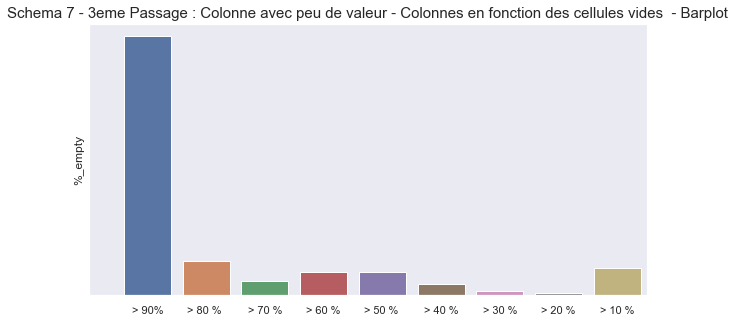

In [20]:
print("1",d_3_1_2.shape)
a = d_3_1_2[d_3_1_2['Total'] > 0.9]
print(("A",a.shape))

c = d_3_1_2[d_3_1_2['Total'] > 0.8]
print(("c",c.shape))
e = d_3_1_2[d_3_1_2['Total'] > 0.7]
print(("E",e.shape))
h = d_3_1_2[d_3_1_2['Total'] > 0.6]
print(("h",h.shape))
j = d_3_1_2[d_3_1_2['Total'] > 0.5]
print(("j",j.shape))
k = d_3_1_2[d_3_1_2['Total'] > 0.4]
print(("k",k.shape))
l = d_3_1_2[d_3_1_2['Total'] > 0.3]
print(("l",l.shape))
m = d_3_1_2[d_3_1_2['Total'] > 0.2]
print(("m",m.shape))
n = d_3_1_2[d_3_1_2['Total'] > 0.1]
print(("n",n.shape))



d_3_1_2_2 = {"%_empty" : [112, 127-112 , 133-127 , 137-127 , 147-137, 152-147,154-152, 1, 167-155 ]}
d_3_1 = pd.DataFrame(data=d_3_1_2_2)
sns.set(font_scale=1)
d_3_2_1 = d_3_1.rename(index={0: '> 90%', 1: '> 80 % ', 2: '> 70 %', 3: '> 60 %', 4: '> 50 % ', 5: '> 40 %', 6: '> 30 %', 7: '> 20 %', 8: '> 10 %'})


plt.figure(figsize=(10, 5))
res = sns.barplot(x=d_3_2_1.index, y="%_empty", data=d_3_2_1)
res.set(xlim=(-1),xticks=[0,1,2,3,4,5,6,7,8],yticks=[])
plt.xticks(rotation=0)
str = "Schema 7 - 3eme Passage : Colonne avec peu de valeur - Colonnes en fonction des cellules vides  - Barplot"
plt.title(str, fontsize=15)

Text(0.5, 1.0, 'Schema 8 - 3eme Passage : Colonne avec peu de valeur - BoxPlot')

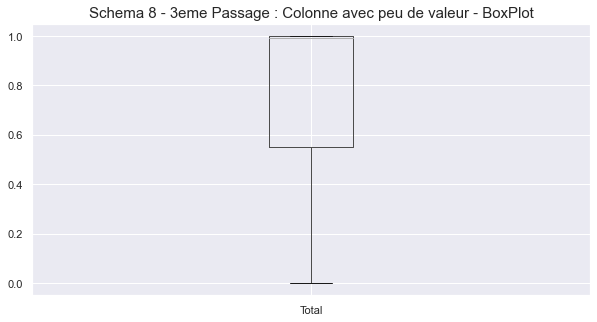

In [21]:
plt.figure(figsize=(10, 5))
boxplot = d_3_1_2.boxplot(column=['Total'])
str = "Schema 8 - 3eme Passage : Colonne avec peu de valeur - BoxPlot"
plt.title(str, fontsize=15)

In [22]:

print(d_3_1_2['Total'].astype(int).describe())

count    170.000000
mean       0.017647
std        0.132054
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Total, dtype: float64


In [23]:
d_3_1_2.describe()

,Total
count,170.000000
mean,0.752096
std,0.355464
min,0.000000
25%,0.551645
50%,0.993110
75%,0.999757
max,1.000000


In [24]:
d_2 = d_1.T
d_3 = d_2["Total"]
print(d_3.astype(int).describe())


count    170.000000
mean       0.017647
std        0.132054
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Total, dtype: float64


In [25]:
d_4 = d_2[d_2.Total < 0.752096]


//////////////////////
Empty Cell 3 :  29 %
//////////////////////


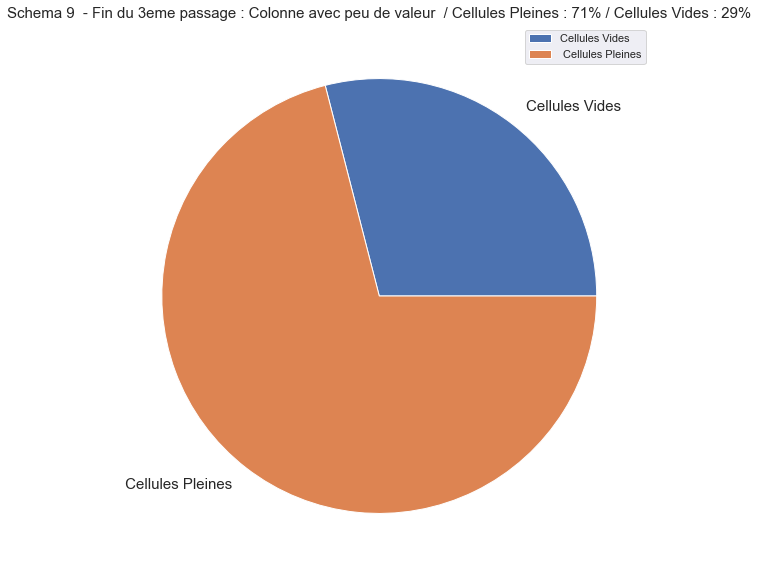

In [26]:
mEmptyCell_data = mEmptyCell(d_4)
print("//////////////////////")
print("Empty Cell 3 : ", mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 9  - Fin du 3eme passage : Colonne avec peu de valeur  / Cellules Pleines : 71% / Cellules Vides : 29%'
a = mEmptyGraph(mEmptyCell_data ,str)

    
   # 7 //  4eme Nettoyage // Variable interessante

In [27]:
#Pour info
d_4.loc["Empty"] = d_4.isna().sum() 
d_4.loc["Empty"] = d_4.loc["Empty"]/424308
d_4_1 = d_4.T
d_4_2 = d_4_1["Empty"]
d_4_5 = pd.DataFrame(data=d_4_2)
d_4_6 = d_4_5.sort_values(by=['Empty'], ascending=False)
d_4_6.head(5)
#Pour info

/Users/rogerrabbit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-27-2cb245f6dc22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_4.loc["Empty"] = d_4.loc["Empty"]/424308


,Empty
767338,9.66279e-05
451774,9.66279e-05
451557,9.66279e-05
451578,9.66279e-05
451593,9.66279e-05


In [28]:
# TRES LONG A RELANCER 

#plt.figure(figsize=(15, 10))
#sns.set(font_scale=0.5)
#ax = sns.barplot(x=d_4_6.index, y="Empty", data=d_4_6)
#res.set(xlim=(3),xticks=[],yticks=[])
#plt.xticks(rotation=90)
#plt.title("Schema 10  - 4eme passage : variable intéréssante", fontsize=15)


In [29]:
d_41 = d_4.T
keep_label= ['code',      
'product_name'    ,  
'brands' ,        
'categories_en'     ,  
'energy-kcal_100g' ,
'energy_100g',
'fat_100g',
'saturated-fat_100g' ,
'carbohydrates_100g',
'sugars_100g' ,
'proteins_100g' ,
'salt_100g'  ,
'sodium_100g',
'nutrition-score-fr_100g' ,
'fiber_100g' ]


d_5 = d_41[keep_label]


//////////////////////
Empty Cell 4 :  25 %
//////////////////////


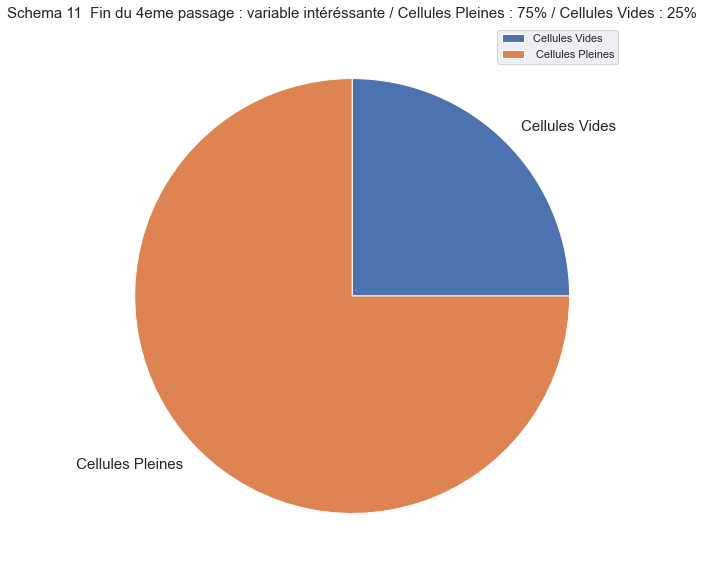

In [30]:
mEmptyCell_data = mEmptyCell(d_5)
print("//////////////////////")
print("Empty Cell 4 : ", mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 11  Fin du 4eme passage : variable intéréssante / Cellules Pleines : 75% / Cellules Vides : 25%'
a = mEmptyGraph(mEmptyCell_data,str)

# 7 //  5eme Nettoyage // check Row

In [31]:
d_6 = d_5.T
d_6.loc["Total_R"] = d_6.isna().sum()/15
d_7 = d_6.T
d_7_1 = pd.to_numeric(d_7['Total_R'])
d_7_1.describe()


count    510661.000000
mean          0.246862
std           0.271914
min           0.000000
25%           0.066667
50%           0.133333
75%           0.266667
max           0.933333
Name: Total_R, dtype: float64

In [32]:
d_7_1_1 = pd.DataFrame(data=d_7_1)
print(d_7_1.describe())
d_7_1_2 = d_7_1_1.sort_values(by=['Total_R'], ascending=False)
d_7 = d_6.T
d_7.drop(d_7[d_7.Total_R > 0.266667].index, inplace=True)
d_7

count    510661.000000
mean          0.246862
std           0.271914
min           0.000000
25%           0.066667
50%           0.133333
75%           0.266667
max           0.933333
Name: Total_R, dtype: float64


,code,product_name,brands,categories_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,fiber_100g,Total_R
0,0000000000017,Vitória crackers,NaN,NaN,375,1569,7,3.08,70.1,15,7.8,1.4,0.56,NaN,NaN,0.266667
3,0000000000100,moutarde au moût de raisin,courte paille,"Groceries,Condiments,Sauces,Mustards",NaN,936,8.2,2.2,29,22,5.1,4.6,1.84,18,0,0.0666667
5,0000000000123,Sauce Sweety chili 0%,NaN,NaN,21,88,0,0,4.8,0.4,0.2,2.04,0.816,NaN,NaN,0.266667
6,0000000000178,Mini coco,NaN,NaN,60,251,3,1,10,3,2,1.15,0.46,NaN,NaN,0.266667
13,0000000000949,Salade de carottes râpées,NaN,"Meals,Prepared vegetables,Grated carrots,Seaso...",32,134,0.3,0.1,5.3,3.9,0.9,0.42,0.168,1,NaN,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555476,9999991042742,Mousse au chocolat noir,NaN,"Desserts,Chocolate desserts,Chocolate mousses",346,1448,27,17,19,18,6,0.19,0.076,17,NaN,0.133333
1555478,9999991149090,Riz parfumé,King Elephant,"Plant-based foods and beverages,Plant-based fo...",351,1469,0.5,0,80,0,7,0,0,0,NaN,0.0666667
1555482,9999999004360,Minis beignets,NaN,"Snacks,Sweet snacks,Sweet Fritters",333,1393,20.2,6,30.9,10.4,7.4,1.1,0.44,15,NaN,0.133333
1555484,99999995,Steak haché pur boeuf,NaN,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Gr...",131,548,5,2.3,0,0,21.5,0.18,0.072,-2,NaN,0.133333


Text(0.5, 1.0, 'Schema 12  - 5eme passage : Lignes avec peu de valeur ')

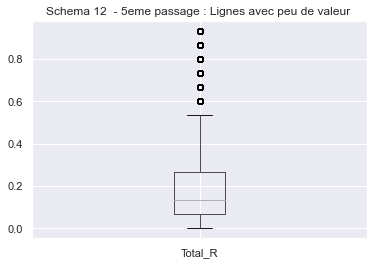

In [33]:
boxplot = d_7_1_2.boxplot(column=['Total_R'])
plt.title("Schema 12  - 5eme passage : Lignes avec peu de valeur ")

In [34]:
#plt.figure(figsize=(15, 10))
#sns.set(font_scale=0.5)
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_7_1_2.index, y="Total_R", data=d_7_1_2)
#res.set(xlim=(3),xticks=[],yticks=[])
#plt.xticks(rotation=90)
#plt.title("Schema 12  - 5eme passage : Lignes avec peu de valeur", fontsize=15)


//////////////////////
Empty Cell 5 :  12 %
//////////////////////


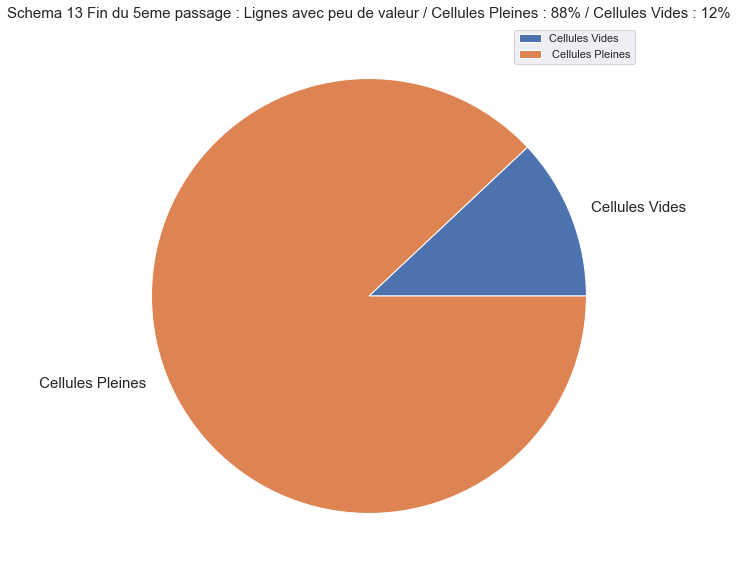

In [35]:
mEmptyCell_data = mEmptyCell(d_7)
print("//////////////////////")
print("Empty Cell 5 : ", mEmptyCell_data ,"%")
print("//////////////////////")

str = "Schema 13 Fin du 5eme passage : Lignes avec peu de valeur / Cellules Pleines : 88% / Cellules Vides : 12%"
a = mEmptyGraph(mEmptyCell_data,str)

# 8 Last Drop

In [36]:
d_7.drop('Total_R', inplace=True, axis=1)
d_7

,code,product_name,brands,categories_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,fiber_100g
0,0000000000017,Vitória crackers,NaN,NaN,375,1569,7,3.08,70.1,15,7.8,1.4,0.56,NaN,NaN
3,0000000000100,moutarde au moût de raisin,courte paille,"Groceries,Condiments,Sauces,Mustards",NaN,936,8.2,2.2,29,22,5.1,4.6,1.84,18,0
5,0000000000123,Sauce Sweety chili 0%,NaN,NaN,21,88,0,0,4.8,0.4,0.2,2.04,0.816,NaN,NaN
6,0000000000178,Mini coco,NaN,NaN,60,251,3,1,10,3,2,1.15,0.46,NaN,NaN
13,0000000000949,Salade de carottes râpées,NaN,"Meals,Prepared vegetables,Grated carrots,Seaso...",32,134,0.3,0.1,5.3,3.9,0.9,0.42,0.168,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555476,9999991042742,Mousse au chocolat noir,NaN,"Desserts,Chocolate desserts,Chocolate mousses",346,1448,27,17,19,18,6,0.19,0.076,17,NaN
1555478,9999991149090,Riz parfumé,King Elephant,"Plant-based foods and beverages,Plant-based fo...",351,1469,0.5,0,80,0,7,0,0,0,NaN
1555482,9999999004360,Minis beignets,NaN,"Snacks,Sweet snacks,Sweet Fritters",333,1393,20.2,6,30.9,10.4,7.4,1.1,0.44,15,NaN
1555484,99999995,Steak haché pur boeuf,NaN,"Meats,Beef,Steaks,Beef steaks,Ground steaks,Gr...",131,548,5,2.3,0,0,21.5,0.18,0.072,-2,NaN


//////////////////////
Empty Cell 6 :  13 %
//////////////////////


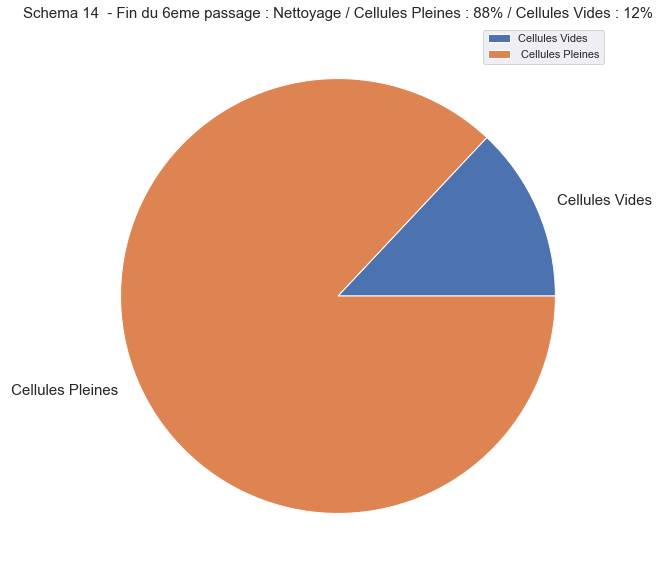

In [37]:
mEmptyCell_data = mEmptyCell(d_7)
print("//////////////////////")
print("Empty Cell 6 : ", mEmptyCell_data ,"%")
print("//////////////////////")

str = "Schema 14  - Fin du 6eme passage : Nettoyage / Cellules Pleines : 88% / Cellules Vides : 12%"
a = mEmptyGraph(mEmptyCell_data,str)

# Send Data

In [38]:
data = d_7
%store data
print(d_7.head(2))
del data

Stored 'data' (DataFrame)
            code                  product_name         brands  \
0  0000000000017              Vitória crackers            NaN   
3  0000000000100   moutarde au moût de raisin   courte paille   

                          categories_en energy-kcal_100g energy_100g fat_100g  \
0                                   NaN              375        1569        7   
3  Groceries,Condiments,Sauces,Mustards              NaN         936      8.2   

  saturated-fat_100g carbohydrates_100g sugars_100g proteins_100g salt_100g  \
0               3.08               70.1          15           7.8       1.4   
3                2.2                 29          22           5.1       4.6   

  sodium_100g nutrition-score-fr_100g fiber_100g  
0        0.56                     NaN        NaN  
3        1.84                      18          0  
